In [1]:
# importing relevant modules
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# reading in data to df
df = pd.read_csv('sphist.csv')

df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [3]:
# converting date col to datetime
df['Date'] = pd.to_datetime(df.Date)


In [4]:
# converting all column names to lowercase

df.columns = df.columns.str.lower()

# removing space in "adj close" col
df.rename(columns={'adj close':'adj_close'}, inplace=True)
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adj_close'], dtype='object')

In [5]:
# making sure our date column is in datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
date         16590 non-null datetime64[ns]
open         16590 non-null float64
high         16590 non-null float64
low          16590 non-null float64
close        16590 non-null float64
volume       16590 non-null float64
adj_close    16590 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 907.3 KB


In [6]:
# sorting data by date
df = df.sort_values('date')


In [7]:
df.head()

,date,open,high,low,close,volume,adj_close
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


## Creating useful measurements that can be used in our prediction algorithms:

- 5 day moving price average


- 30 day moving price average


- 365 day moving price average


- 5 day moving standard deviation


- 30 day moving standard deviation


- 365 day moving standard deviation


- 5 day average volume


- 365 day average volume


- Ratio of avg price for past 5 days to the average price over last 365 days


- Ration of avg std over past 5 days to the average price over last 365 days



In [8]:
# note that we are adding .shift to the end of each function otherwise the calculations will begin on the fifth
# row in the dataframe, instead of the sixth.

#Adding column for five day moving price avg, using rolling function

df['5_day'] = df['adj_close'].rolling(window=5).mean().shift(1, axis=0)

df.head(10)


#Adding column for five day moving price avg, using rolling function

df['30_day'] = df['adj_close'].rolling(window=30).mean().shift(1, axis=0)


#Adding column for five day moving price avg, using rolling function

df['365_day'] = df['adj_close'].rolling(window=365).mean().shift(1, axis=0)


#Adding column for five day moving std avg, using rolling function

df['5_std'] = df['adj_close'].rolling(window=5).std().shift(1, axis=0)


#Adding column for 30 day moving std avg, using rolling function

df['30_std'] = df['adj_close'].rolling(window=30).std().shift(1, axis=0)


#Adding column for 365 day moving std avg, using rolling function

df['365_std'] = df['adj_close'].rolling(window=365).std().shift(1, axis=0)


#Adding column for 5 day moving volume avg, using rolling function

df['5_vol'] = df['volume'].rolling(window=5).std().shift(1, axis=0)


#Adding column for 365 day moving volume avg, using rolling function

df['365_vol'] = df['volume'].rolling(window=365).std().shift(1, axis=0)


#Adding column for ratio of 5 day std avg to 365 std avg, using rolling function

df['5_365_std'] = df['5_std'] / df['365_std']


#Adding column for ratio of 5 day volume avg to 365 volume avg, using rolling function

df['5_365_vol'] = df['5_vol'] / df['365_vol']




In [9]:
# checking to make sure our figures are calculating a year out
df.iloc[364:367]

,date,open,high,low,close,volume,adj_close,5_day,30_day,365_day,5_std,30_std,365_std,5_vol,365_vol,5_365_std,5_365_vol
16225,1951-06-18,22.049999,22.049999,22.049999,22.049999,1050000.0,22.049999,21.712,21.727333,NaN,0.222194,0.508710,NaN,116619.037897,NaN,NaN,NaN
16224,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800,21.703333,19.447726,0.256223,0.473595,1.790253,142232.204511,772310.649463,0.143121,0.184164
16223,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900,21.683000,19.462411,0.213659,0.444648,1.789307,148425.065269,772771.102512,0.119409,0.192069


## Cleaning Missing Data

Now that we have our feature columns, we need to eliminate not only rows where we were not able to calculate feature data, but also any other columns missing data.

First, we will examine the total number of missing data in our dataset

In [10]:
print('total rows in data set: ', len(df))

df.isnull().sum()

total rows in data set:  16590


date           0
open           0
high           0
low            0
close          0
volume         0
adj_close      0
5_day          5
30_day        30
365_day      365
5_std          5
30_std        30
365_std      365
5_vol          5
365_vol      365
5_365_std    365
5_365_vol    365
dtype: int64

Given the amount of data missing (365 rows at most), it's clear that the only rows missing data are the rows we were unable to calculate in our rolling functions, since 365 days is one year.  

We will use df.dropna to remove any of these rows before proceding.

In [11]:
# dropping rows with missing data
df.dropna(axis=0, inplace=True)

# checking to make sure there are no more missing values
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
volume       0
adj_close    0
5_day        0
30_day       0
365_day      0
5_std        0
30_std       0
365_std      0
5_vol        0
365_vol      0
5_365_std    0
5_365_vol    0
dtype: int64

## Dividing Data Into Train and Test Subsets

Because our data is being used to make future predictions and contains date information, we do not want to randomize our training and test data.

We want our training set to be from a time period *before* our test data, that way we can use it to make meaningful predictions about later time periods we have data on.

Our training data set will be comprised of all rows with dates equal to or prior to 2013-01-01

Our test data set will be comprised of all rows with dates later then 2013-01-01


In [12]:
train = df[df.date <= dt.datetime(2013,1,1)]
test = df[df.date > dt.datetime(2013,1,1)]


In [13]:
# checking our date values for train

train.date.describe()

count                   15486
unique                  15486
top       1967-09-20 00:00:00
freq                        1
first     1951-06-19 00:00:00
last      2012-12-31 00:00:00
Name: date, dtype: object

In [14]:
# checking our date values for test


test.date.describe()

count                     739
unique                    739
top       2015-09-24 00:00:00
freq                        1
first     2013-01-02 00:00:00
last      2015-12-07 00:00:00
Name: date, dtype: object

## Defining Error Metric

In order to see how close our predictions are to the actual stock values in the "test" data set, we need to first choose a useful and intuitive metric to measure our error.  

We will be using the mean absolute error, since it returns a quantitative error of exactly how many dollars our prediction was off by.

## Choosing Prediction Algorithm

We will be using Linear Regression as our predictive algorithm, since price is linear data.

We will be leaving out the original columns from our feature-set, since they contain future information and would cause data leakage in our modeling.

We will be predicting 'adj_close' since it handles stock splits, reverse stock splits, etc that cannot reliably be predicted.  This should make our predictions more accurate.

In [25]:
# importing modules
from sklearn.linear_model import LinearRegression

# creating list of features
features = ['5_day',
       '30_day', '365_day', '5_std', '30_std', '365_std', '5_vol', '365_vol',
       '5_365_std', '5_365_vol']

target = 'adj_close'

# training our model
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])

# adding the predictions as a column on the test dataset
test['predictions'] = predictions

# making sure our column is created
test.head()

C:\Users\CliffGaming\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date,open,high,low,close,volume,adj_close,5_day,30_day,365_day,5_std,30_std,365_std,5_vol,365_vol,5_365_std,5_365_vol,predictions
738,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1418.641992,1414.258667,1327.534055,9.820801,17.834740,90.463948,7.366851e+08,7.846668e+08,0.108560,0.938851,1419.112288
737,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1425.793994,1417.676668,1327.908247,22.261321,16.852563,90.738976,7.674944e+08,7.848543e+08,0.245334,0.977881,1424.182203
736,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1433.702002,1420.092668,1328.224877,26.274326,17.470824,90.995857,7.224721e+08,7.831860e+08,0.288742,0.922478,1431.717957
735,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1443.376001,1422.714665,1328.557617,27.945242,18.339803,91.279049,6.733364e+08,7.833194e+08,0.306152,0.859594,1441.579759
734,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1455.267993,1425.076664,1328.898603,16.453319,18.678333,91.544368,4.153739e+08,7.836758e+08,0.179731,0.530033,1455.864527


### Calculating Mean Absolute Error

In [23]:
test.iloc[:]['abs_error'] = abs(test.predictions - test.adj_close)

test.head(5)


,date,open,high,low,close,volume,adj_close,5_day,30_day,365_day,5_std,30_std,365_std,5_vol,365_vol,5_365_std,5_365_vol,predictions
738,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1418.641992,1414.258667,1327.534055,9.820801,17.834740,90.463948,7.366851e+08,7.846668e+08,0.108560,0.938851,1419.112288
737,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1425.793994,1417.676668,1327.908247,22.261321,16.852563,90.738976,7.674944e+08,7.848543e+08,0.245334,0.977881,1424.182203
736,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1433.702002,1420.092668,1328.224877,26.274326,17.470824,90.995857,7.224721e+08,7.831860e+08,0.288742,0.922478,1431.717957
735,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1443.376001,1422.714665,1328.557617,27.945242,18.339803,91.279049,6.733364e+08,7.833194e+08,0.306152,0.859594,1441.579759
734,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1455.267993,1425.076664,1328.898603,16.453319,18.678333,91.544368,4.153739e+08,7.836758e+08,0.179731,0.530033,1455.864527


In [ ]:
# Mean Absolute Error
mae = test.abs_error.mean()
print('$',round(mae,2))

## Visualizing Predictions vs Actual Stock Prices


<IPython.core.display.Javascript object>


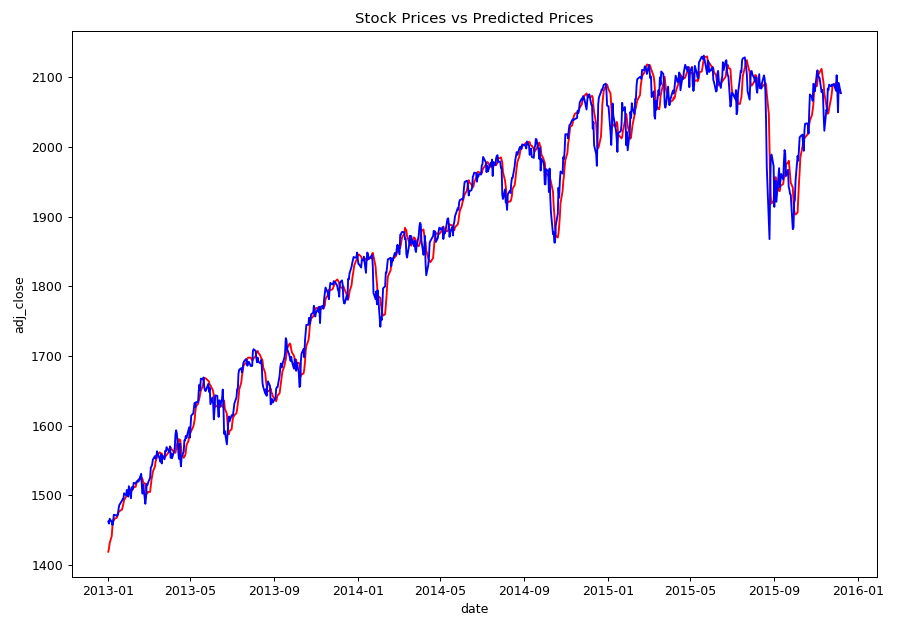

C:\Users\CliffGaming\Anaconda3\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register

In [24]:
# plotting stock prices

# importing jupyter magic line so we can zoon in on the map
%matplotlib nbagg

# setting title and size of graph
plt.figure(figsize=(10,7))
plt.title("Stock Prices vs Predicted Prices")

# plotting our predictions in red and actual prices in blue
sns.lineplot(test.date, test.predictions, c='red')
sns.lineplot(test.date, test.adj_close, c='blue')

# tight layout to help fill the window properly with our graph
plt.tight_layout()

plt.show()

# Conclusions

The absolute error rate in prediction was fairly low from day to day, and very low overall.  This could give a false impression of how accurate our prediction is, however.  If you zoom in on any point in the graph, you can see that our predictions are always usually a step behind the actual chart movement, and appears to "follow" the stock market more than predicting it.

Our red line appears very similar to the way a basic trendline shifted a day to the future would appear, and following the advice of this prediction may work better as a way of smoothing out trades or hedging, vs actually predicting the future of the stock market.

Notice that during any steep drop, our algorithm never predicts the bottom until after the bottom is reached.  

Similarly, during a steep climb, our algorithm appears to always predict future increases until the top is already reached.

This could be a dangerous method for investing, especially during extremely volatile periods of price movement.

